In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from pImpactR.util import naff
fname = 'lattice84_equilibrium_t0p1_c0p01_hkick586urad.h5'
data = h5py.File(fname, 'r')

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Check Data

In [2]:
list(data.keys())

['centroid', 'envelope', 'turn']

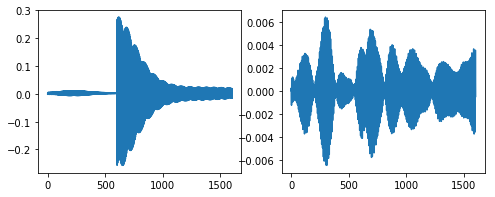

In [3]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(data['centroid'][:,0])
plt.subplot(1,2,2)
plt.plot(data['centroid'][:,1])

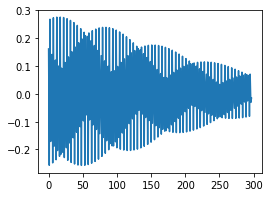

In [4]:
plt.figure(figsize=(4,3))
plt.plot(data['centroid'][602:900,0])

# Use Hilbert Transformation to construct Px

In [5]:
X =data['centroid'][602:,0]
Z = X + 1j*hilbert(X)
Z = Z*np.exp(-1j*np.angle(Z[0]))
Z = Z/Z[0]
print(Z[0])

(1+0j)


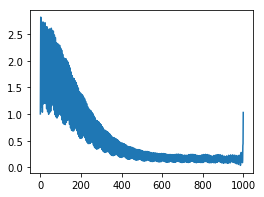

In [6]:
plt.figure(figsize=(4,3))
plt.plot(np.abs(Z))
Z = Z[:-200]

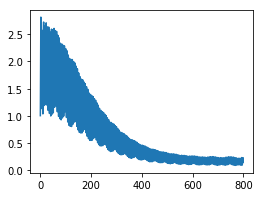

In [7]:
plt.figure(figsize=(4,3))
plt.plot(np.abs(Z))

# Frequency Analysis

In [8]:
tune,amp,Z1 = naff(1,Z)
print(tune)

fftZ = np.fft.fft(Z)
fftZ1 = np.fft.fft(Z1)

[0.40255547]


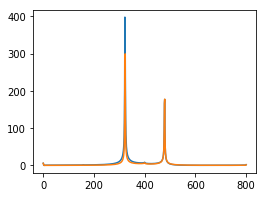

In [9]:
plt.figure(figsize=(4,3))
plt.plot(np.abs(fftZ))
plt.plot(np.abs(fftZ1))

In [10]:
nSample = 1024
Tune = tune + np.linspace(-0.005,0.005,nSample)
Amp = np.zeros(nSample,dtype=np.complex128)
n=len(Z)
for k in range(nSample):
    Amp[k] = np.sum(Z*np.exp(-1j*2.0*np.pi*Tune[k]*np.arange(0,n)))

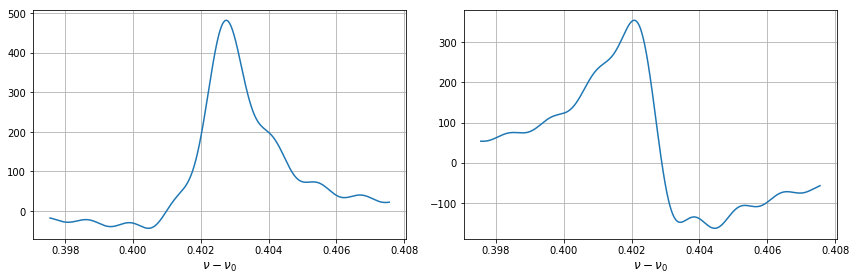

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(Tune,np.real(Amp))
plt.xlabel(r'$\nu-\nu_0$',fontsize=12);
plt.grid()
plt.subplot(1,2,2)
plt.plot(Tune,np.imag(Amp))
plt.xlabel(r'$\nu-\nu_0$',fontsize=12);
plt.grid()
plt.tight_layout()